# Column Description

1. **Diabetes_binary** : 0 = no diabetes 1 = prediabetes 2 = diabetes
2. **HighBP** : 0 = no high BP 1 = high BP
3. **HighChol** : 0 = no high cholesterol 1 = high cholesterol
4. **CholCheck** : 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
5. **BMI** : Body Mass Index
6. **Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
7. **Stroke** : (Ever told) you had a stroke. 0 = no 1 = yes
8. **HeartDiseaseorAttack** :coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
9. **PhysActivity** : physical activity in past 30 days - not including job 0 = no 1 = yes
10. **Fruits** : Consume Fruit 1 or more times per day 0 = no 1 = yes
11. **Veggies** : Consume Vegetables 1 or more times per day 0 = no 1 = yes
12. **HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no
13. **AnyHealthcare** : Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
14. **NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
15. **GenHlth** : Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16. **MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how
17. **PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
18. **DiffWalk** : Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
19. **Sex** : 0 = female 1 = male
20. **Age** : 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
21. **Education** : Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8
22. **Income** : Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# Importing Dataset

In [2]:
df = pd.read_csv("diabetes_binary.csv")
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Data Cleaning

In [3]:
df.shape

(253680, 22)

In [4]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [7]:
unique_values = {}

for col in df.columns:
    unique_values[col] = df[col].nunique()

pd.DataFrame(unique_values, index=['unique value count']).transpose()
    

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [8]:
# Checking for null values
df.isnull().sum().any()

False

In [9]:
# Dropping Duplicates
df.drop_duplicates(inplace = True)

df.shape

(229474, 22)

# EDA

In [10]:

df["Diabetes_binary_string"]= df["Diabetes_binary"].replace({0:"NOn-Diabetic",1:"Diabetic"})

df["Diabetes_binary_string"].value_counts()


NOn-Diabetic    194377
Diabetic         35097
Name: Diabetes_binary_string, dtype: int64

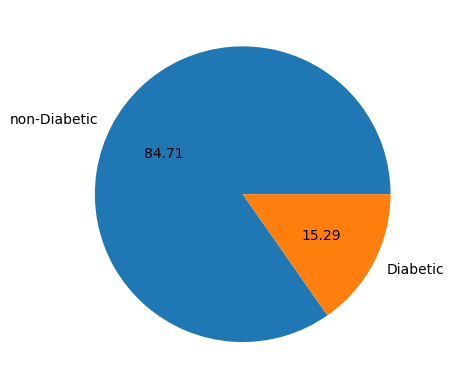

In [11]:

labels=["non-Diabetic","Diabetic"]

plt.pie(df["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

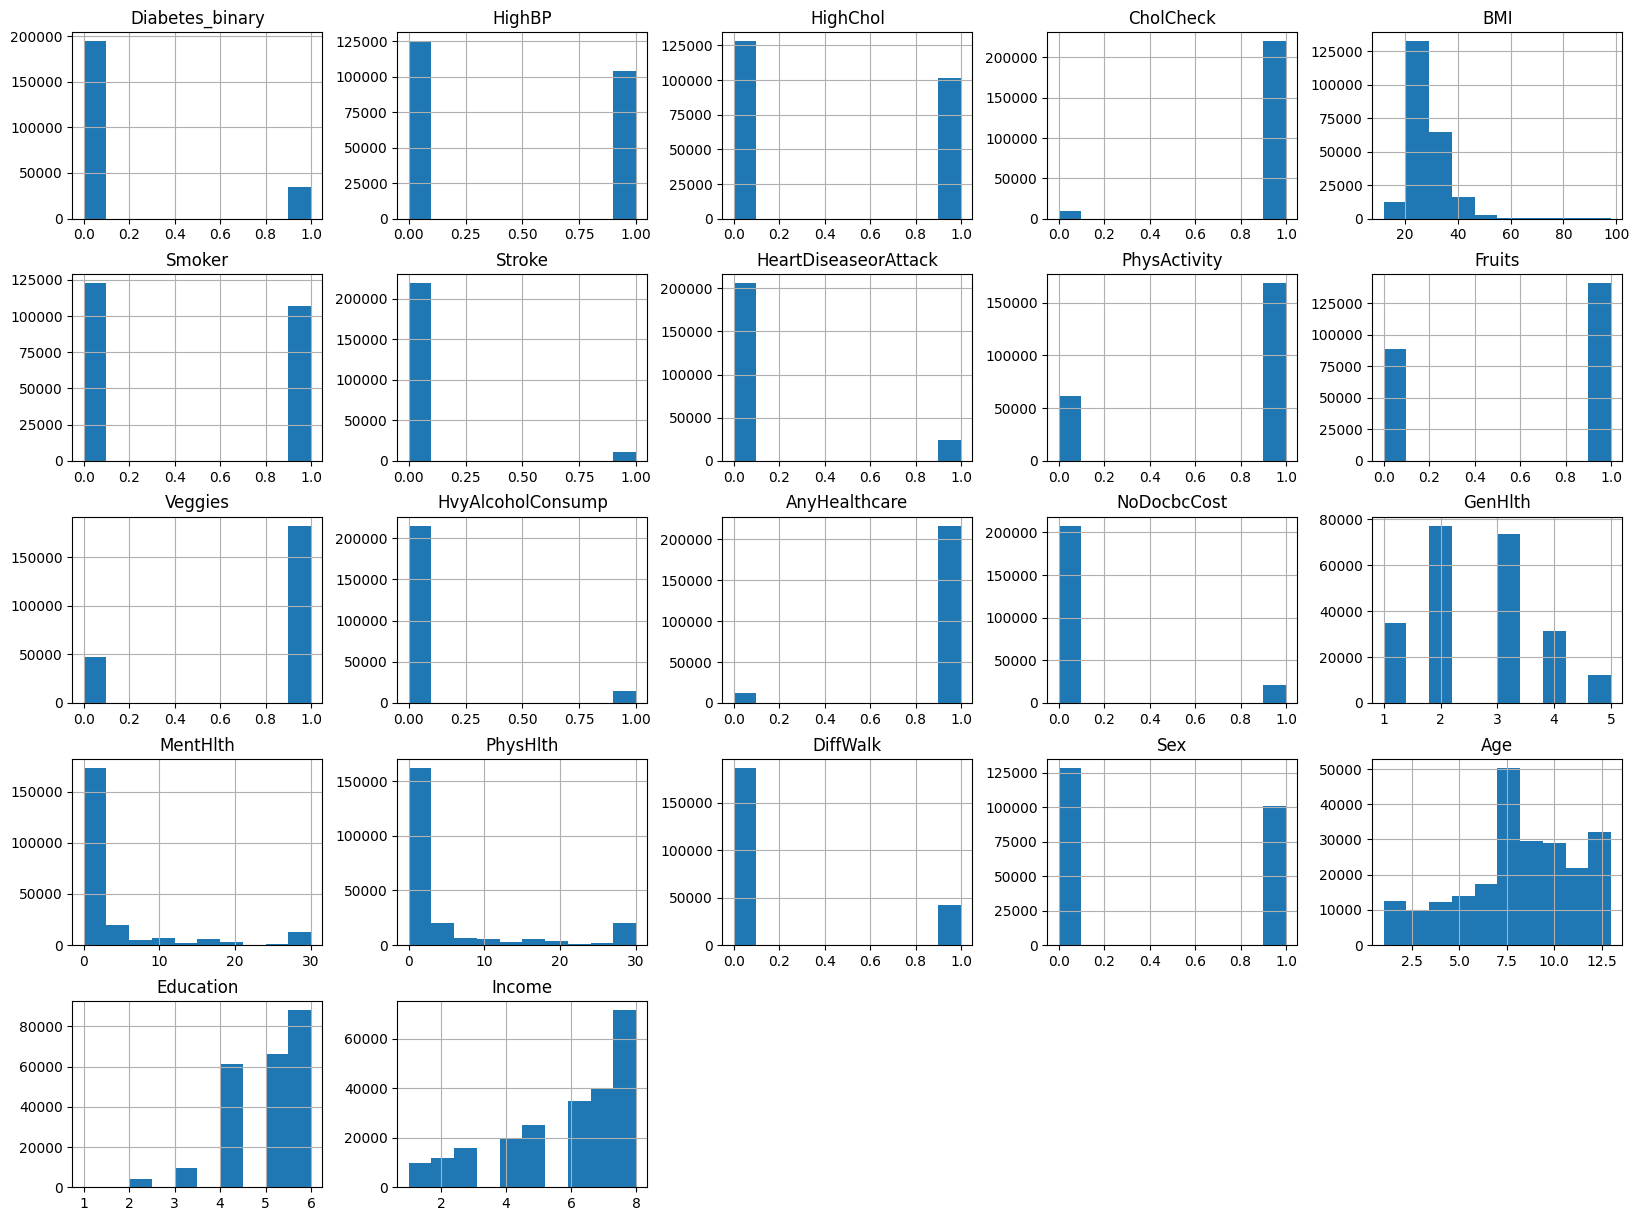

In [12]:
df.hist(figsize=(20,15));

C:\Users\rahul\AppData\Local\Temp\ipykernel_10516\336404057.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )


Text(0.5, 1.0, 'correlation of feature')

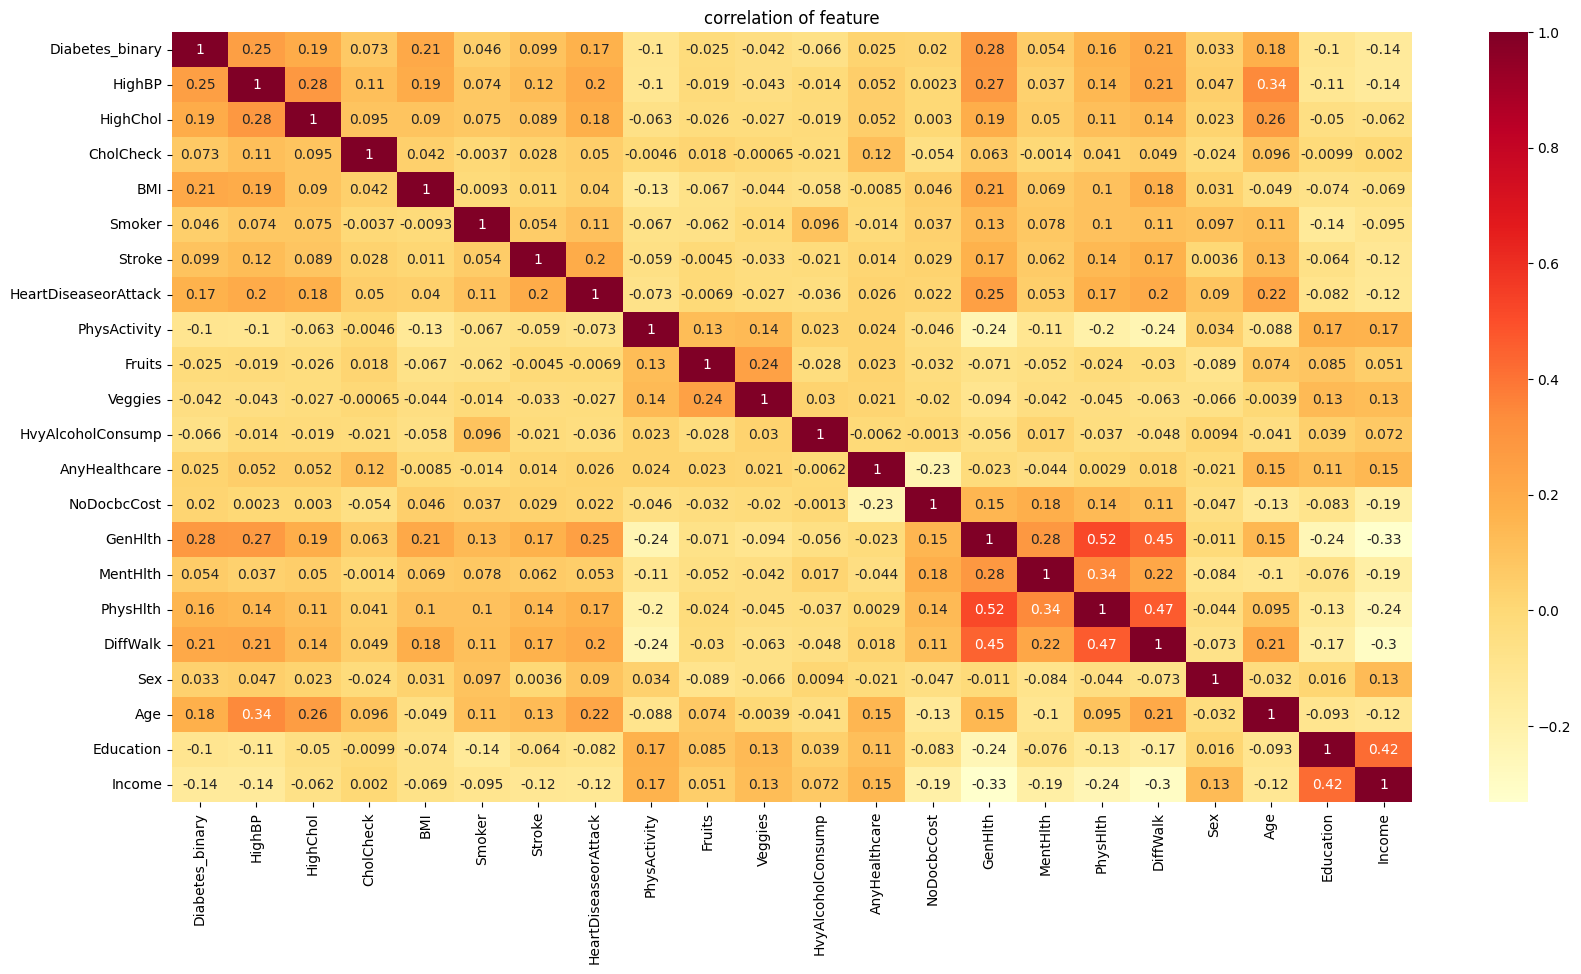

In [13]:
# correlation between the columns
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

C:\Users\rahul\AppData\Local\Temp\ipykernel_10516\3164895142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 5)


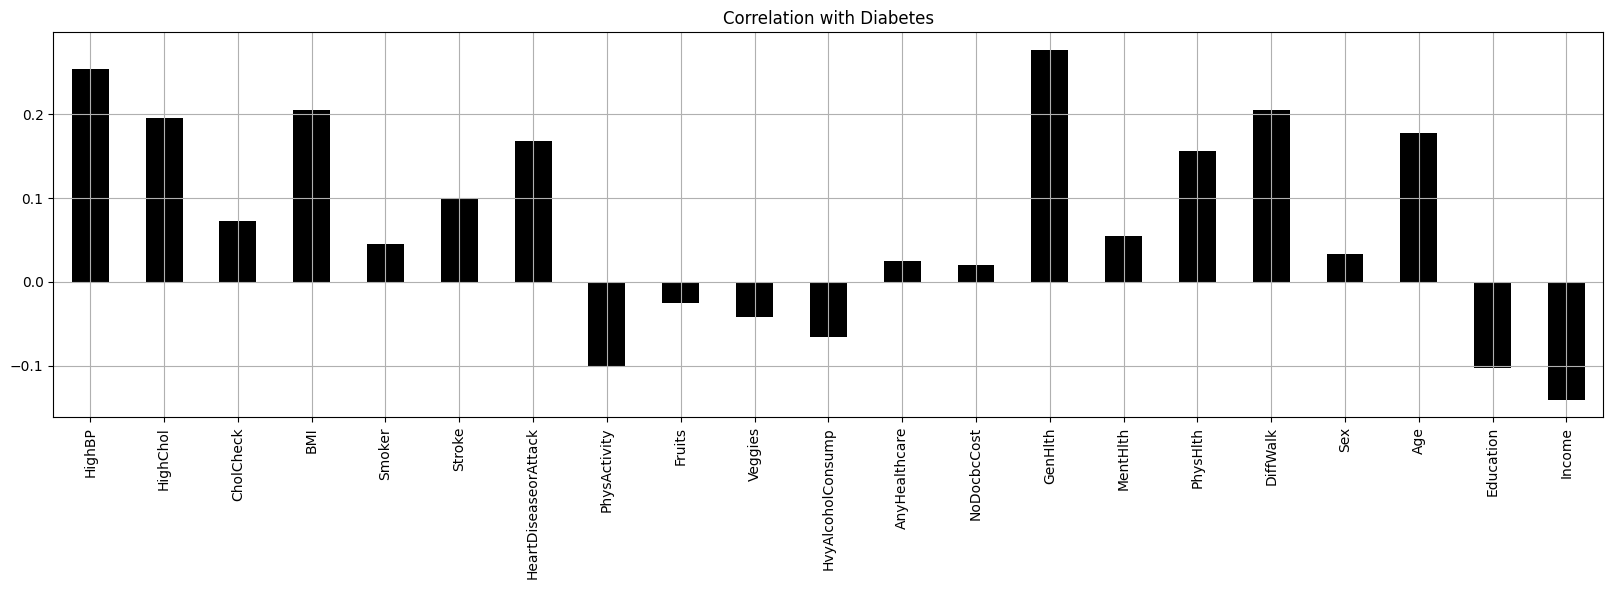

In [14]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 5)
, title="Correlation with Diabetes",color="black");

## Correlation with High blood presure

In [15]:
pd.crosstab(df.HighBP,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
HighBP,,
0.0,8692,116522
1.0,26405,77855


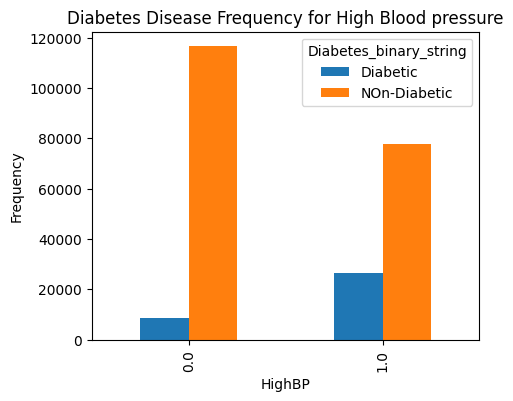

In [16]:
pd.crosstab(df.HighBP,df.Diabetes_binary_string).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for High Blood pressure')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()

**Having a high blood pressure strongly correlates with diabetes.**

## Correlation with High Cholesterol

In [17]:
pd.crosstab(df.HighChol,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
HighChol,,
0.0,11601,116528
1.0,23496,77849


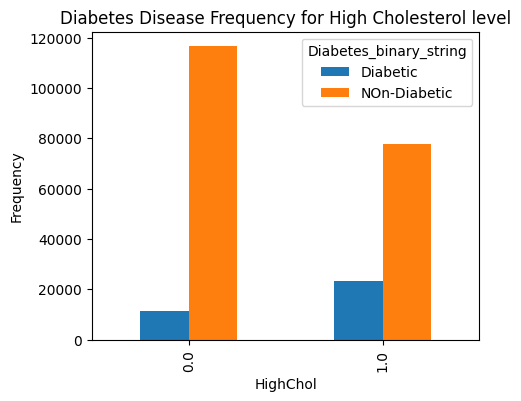

In [18]:
pd.crosstab(df.HighChol,df.Diabetes_binary_string).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for High Cholesterol level')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()

**High Cholesterol also possitivly correlated to diabetes.**

## Relation with BMI

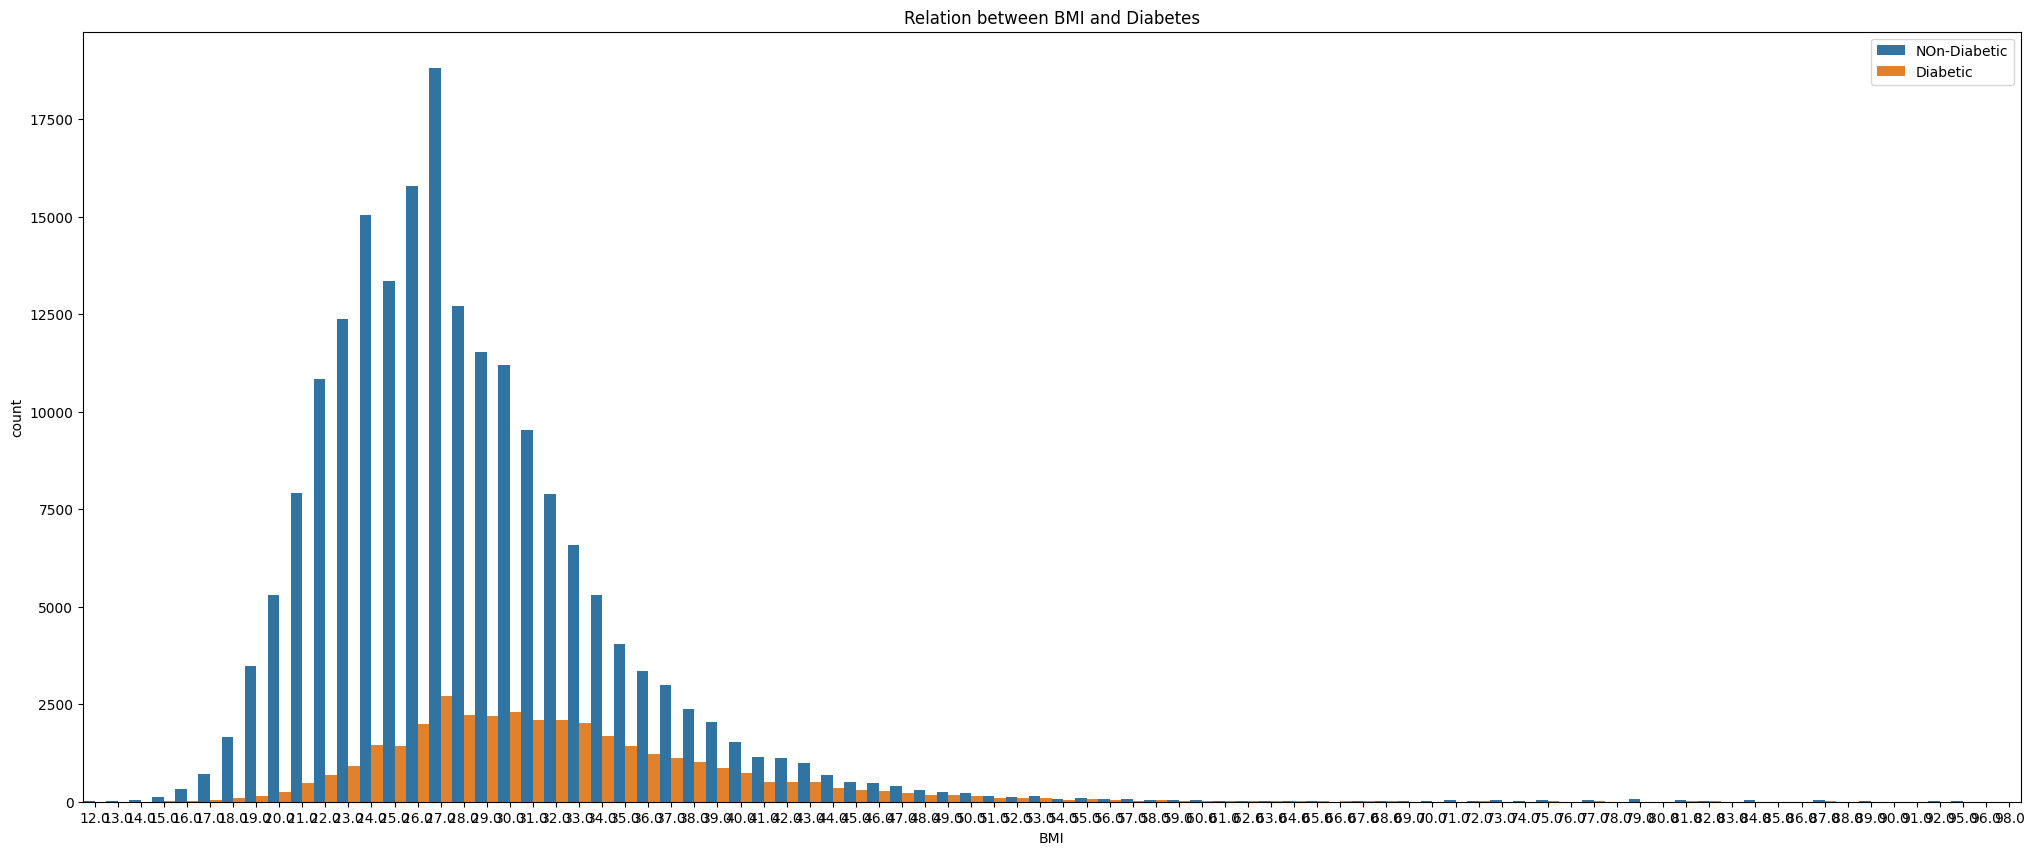

In [19]:

plt.figure(figsize=(25, 10))
sns.countplot(x=df["BMI"],hue=df["Diabetes_binary_string"], width=1)
plt.title("Relation between BMI and Diabetes",)
plt.legend()

### Dividing BMI into 3 groups for futher investigation

In [20]:
df[(df["BMI"]<=20)]["Diabetes_binary"].value_counts()

0.0    11650
1.0      545
Name: Diabetes_binary, dtype: int64

In [21]:
group_2 = df.iloc[np.where((df["BMI"]>20)&(df["BMI"]<=50))]["Diabetes_binary"]
group_2.value_counts()

0.0    181255
1.0     33849
Name: Diabetes_binary, dtype: int64

In [22]:
df[(df["BMI"]>50)]["Diabetes_binary"].value_counts()

0.0    1472
1.0     703
Name: Diabetes_binary, dtype: int64

1. **Nearly 50% people having high BMI(>50) are diabetic.**
2. **Very small percentage of people having BMI<20 are diabetic**

## Relation with Smoking and Heavy Alcohol consumption.

Text(0.5, 1.0, 'Relation b/w Smoker and HvyAlcoholConsump with Diabetes')

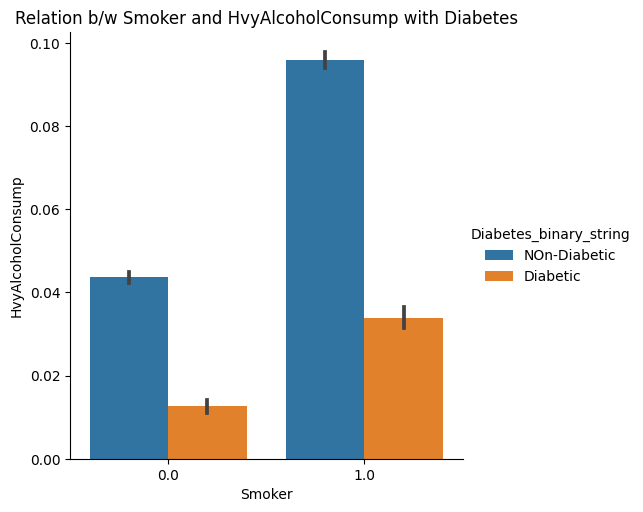

In [23]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = df , hue="Diabetes_binary_string"  , kind="bar"  );  
plt.title("Relation b/w Smoker and HvyAlcoholConsump with Diabetes")

**Smoking and high alcohol consumption significantly increases the chance of having diabetes.**

## Relation with Stroke and Heart Disorder

Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

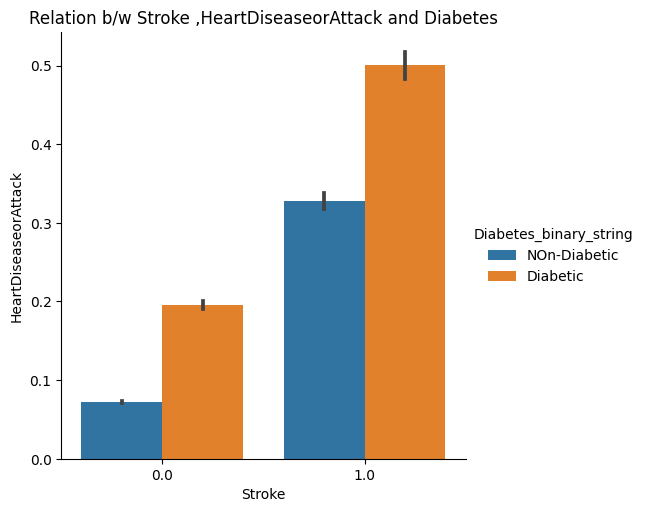

In [24]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = df , hue="Diabetes_binary_string"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

**Diabetic persion is predisposed to heart disorder and stroke.**

## Relation With The level of Healthy Lifestyle (Physical activity, Fruits and vegitables intake )

In [25]:
pd.crosstab(df.PhysActivity,df.Diabetes_binary_string)


Diabetes_binary_string,Diabetic,NOn-Diabetic
PhysActivity,,
0.0,13038,48222
1.0,22059,146155


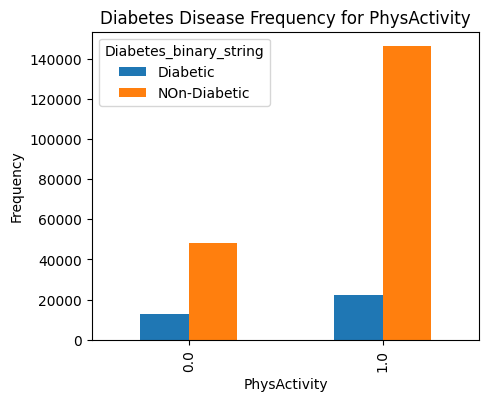

In [26]:

pd.crosstab(df.PhysActivity,df.Diabetes_binary_string).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

In [27]:
pd.crosstab(df.Fruits,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
Fruits,,
0.0,14592,74289
1.0,20505,120088


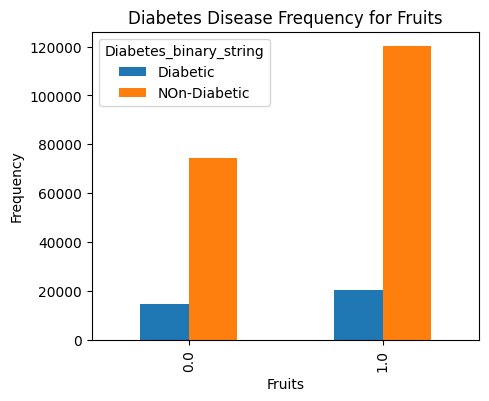

In [28]:
pd.crosstab(df.Fruits,df.Diabetes_binary_string).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

In [29]:
pd.crosstab(df.Veggies,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
Veggies,,
0.0,8602,38535
1.0,26495,155842


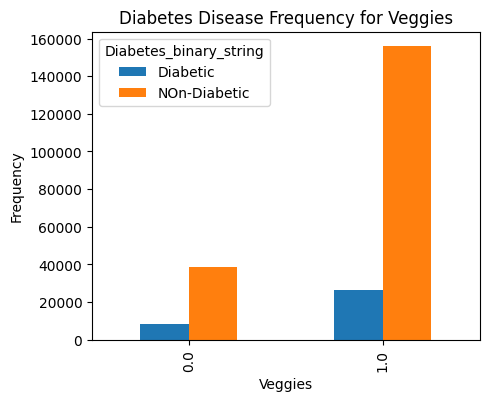

In [30]:
pd.crosstab(df.Veggies,df.Diabetes_binary_string).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

1. **Physical activity decreses the possibility of having diabetes.**
2. **Daily Fruit and vegitable consumption is good for your health.**

## Health : GenHlth , MentHlth , PhysHlth and DiffWalk's effect on Diabetes

### General Health

In [31]:
pd.crosstab(df.GenHlth,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
GenHlth,,
1.0,1135,33719
2.0,6280,71085
3.0,13324,60308
4.0,9781,21764
5.0,4577,7501


Text(0.5, 1.0, 'Relation between General Health and Diabetes')

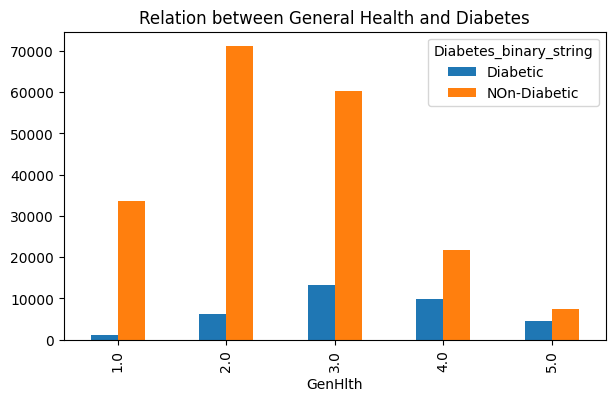

In [32]:
pd.crosstab(df.GenHlth,df.Diabetes_binary_string).plot(kind="bar",figsize=(7,4)) 
plt.title("Relation between General Health and Diabetes")

### Mental Health

In [33]:
pd.crosstab(df.MentHlth,df.Diabetes_binary_string).T

MentHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary_string,,,,,,,,,,,,,,,,,,,,,
Diabetic,23155,812,1507,924,489,1223,164,405,110,13,...,48,11,8,6,273,7,12,57,30,2768
NOn-Diabetic,129170,7495,11185,6377,3285,7690,824,2685,529,78,...,179,52,30,27,915,38,67,270,128,9311


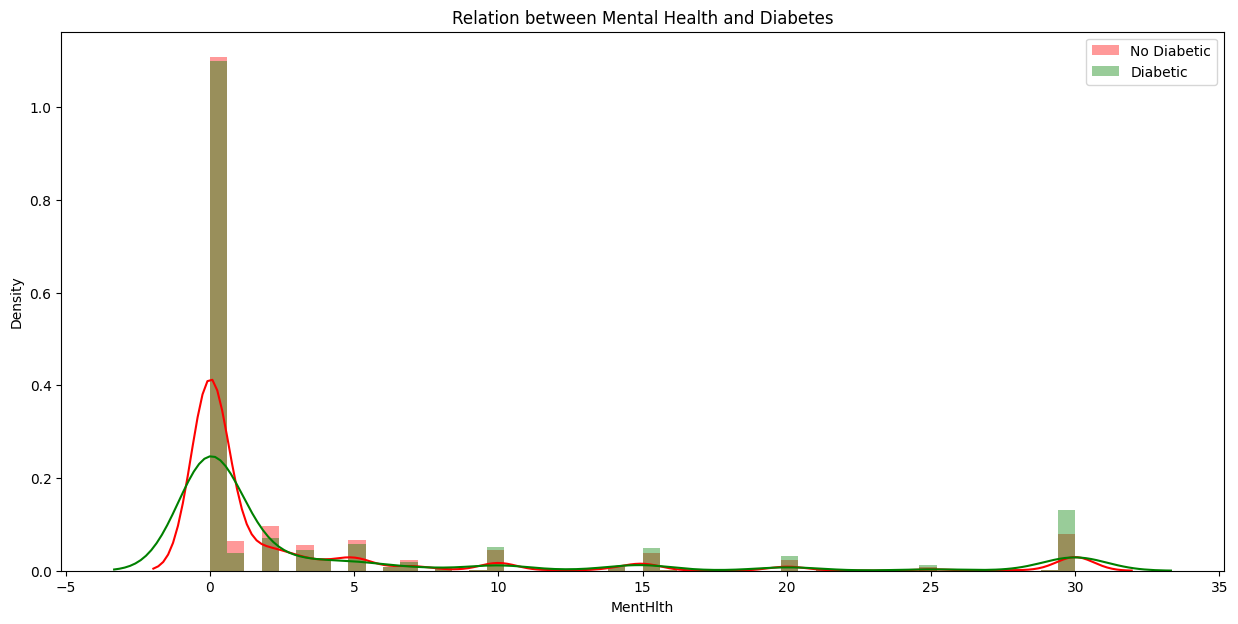

In [34]:
plt.figure(figsize=(15, 7))
warnings.filterwarnings('ignore')

sns.distplot(df.MentHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.MentHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation between Mental Health and Diabetes")

plt.legend()

**Diabetic people are predisposed to mental health problems.**

### Physical Health

In [35]:
pd.crosstab(df.PhysHlth,df.Diabetes_binary_string).T

PhysHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary_string,,,,,,,,,,,,,,,,,,,,,
Diabetic,16497,1187,2027,1289,763,1314,282,742,159,36,...,139,23,16,15,394,22,21,143,74,5724
NOn-Diabetic,120081,9886,12464,7146,3758,6281,1046,3789,650,143,...,524,47,40,57,942,47,78,379,141,13661


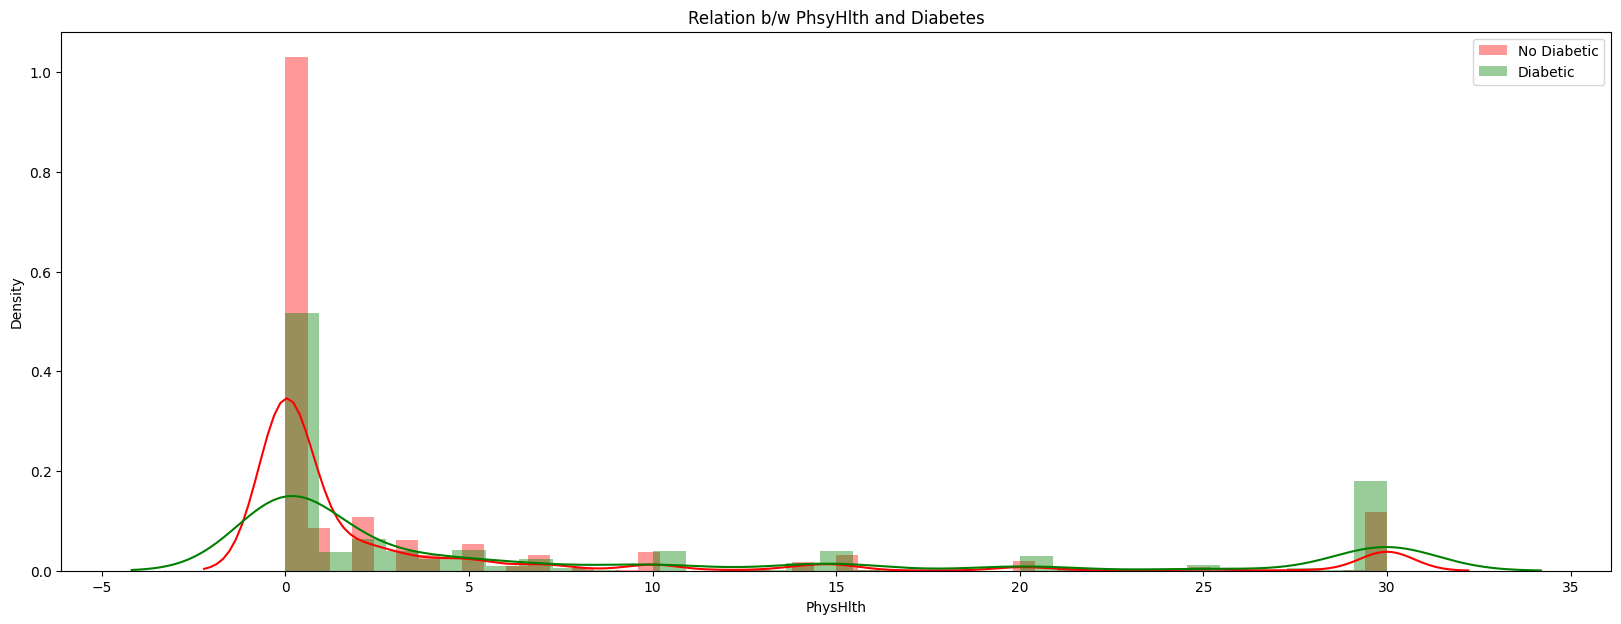

In [36]:
plt.figure(figsize=(20, 7))
warnings.filterwarnings('ignore')

sns.distplot(df.PhysHlth[df.Diabetes_binary == 0], color="r", label="No Diabetic" )
sns.distplot(df.PhysHlth[df.Diabetes_binary == 1], color="g", label="Diabetic" )
plt.title("Relation b/w PhsyHlth and Diabetes")

plt.legend()

### Difficulty Walking

In [37]:
pd.crosstab(df.DiffWalk,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
DiffWalk,,
0.0,21983,164866
1.0,13114,29511


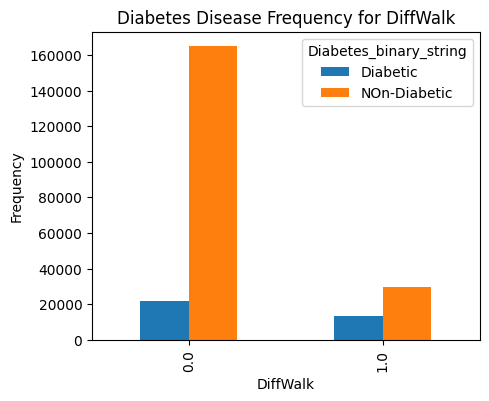

In [38]:
pd.crosstab(df.DiffWalk,df.Diabetes_binary_string).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for DiffWalk')
plt.xlabel("DiffWalk")
plt.ylabel('Frequency')
plt.show()

**50% of the people having difficulties Walking are diabetic in nature.**

## Social (Sex , Age , Education , and Income) effect on Diabetes

### Sex

In [39]:
pd.crosstab(df.Sex,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
Sex,,
0.0,18345,110370
1.0,16752,84007


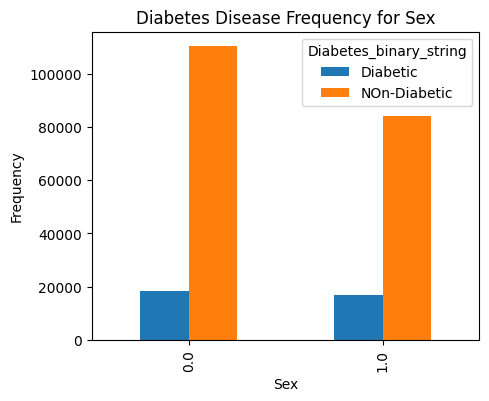

In [40]:
pd.crosstab(df.Sex,df.Diabetes_binary_string).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Sex')
plt.xlabel("Sex")
plt.ylabel('Frequency')
plt.show()

### Age

**Age : range of age gap is 6**

1: Age 18 to 24 | 2: Age 25 to 29 | 3: Age 30 to 34 | 4: Age 35 to 39 | 5: Age 40 to 44 | 6: Age 45 to 49 |7: Age 50 to 54 |8: Age 55 to 59 , 9: Age 60 to 64 | 10: Age 65 to 69 | 11: Age 70 to 74 | 12: Age 75 to 79 | 13: Age 80 or older

In [41]:
pd.crosstab(df.Age,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
Age,,
1.0,78,5433
2.0,140,6924
3.0,314,9709
4.0,625,11604
5.0,1049,12991
6.0,1741,15539
7.0,3072,20049
8.0,4241,23031
9.0,5681,23997


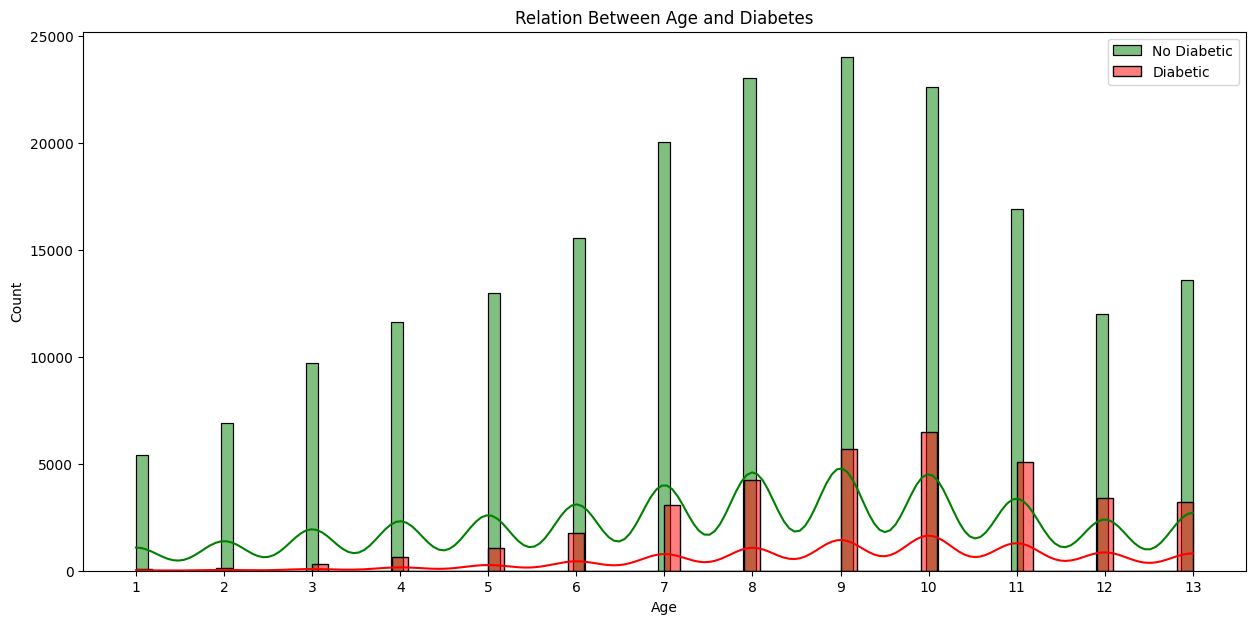

In [42]:
plt.figure(figsize=(15, 7))
sns.histplot(df.Age[df.Diabetes_binary == 0], color="g", label="No Diabetic" , kde = True )
sns.histplot(df.Age[df.Diabetes_binary == 1], color="r", label="Diabetic" , kde = True )
plt.title("Relation Between Age and Diabetes")

plt.xticks(df["Age"].unique())
plt.legend()

**Age and developing diabetes are inversely proportional.**

### Education

1: Never attended school or only kindergarten

2: Grades 1 through 8 (Elementary)

3: Grades 9 through 11 (Some high school)

4: Grade 12 or GED (High school graduate)

5: College 1 year to 3 years (Some college or technical school)

6: College 4 years or more (College graduate)

In [43]:
pd.crosstab(df.Education,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
Education,,
1.0,47,127
2.0,1183,2857
3.0,2296,7171
4.0,11032,50092
5.0,10311,56133
6.0,10228,77997


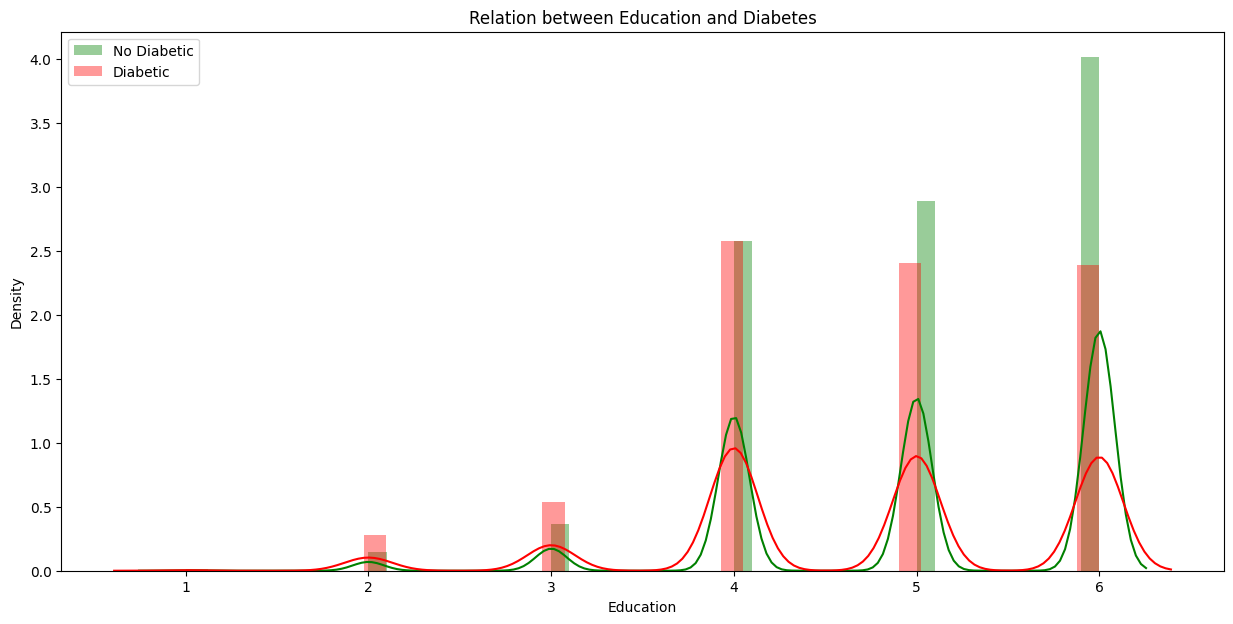

In [44]:
plt.figure(figsize=(15,7))
warnings.filterwarnings('ignore')

sns.distplot(df.Education[df.Diabetes_binary == 0], color="g", label="No Diabetic" )
sns.distplot(df.Education[df.Diabetes_binary == 1], color="r", label="Diabetic" )
plt.title("Relation between Education and Diabetes")

plt.legend()

### Income

In [45]:
pd.crosstab(df.Income,df.Diabetes_binary_string)

Diabetes_binary_string,Diabetic,NOn-Diabetic
Income,,
1.0,2383,7408
2.0,3086,8670
3.0,3564,12356
4.0,4047,15906
5.0,4489,20837
6.0,5260,29697
7.0,5226,34905
8.0,7042,64598


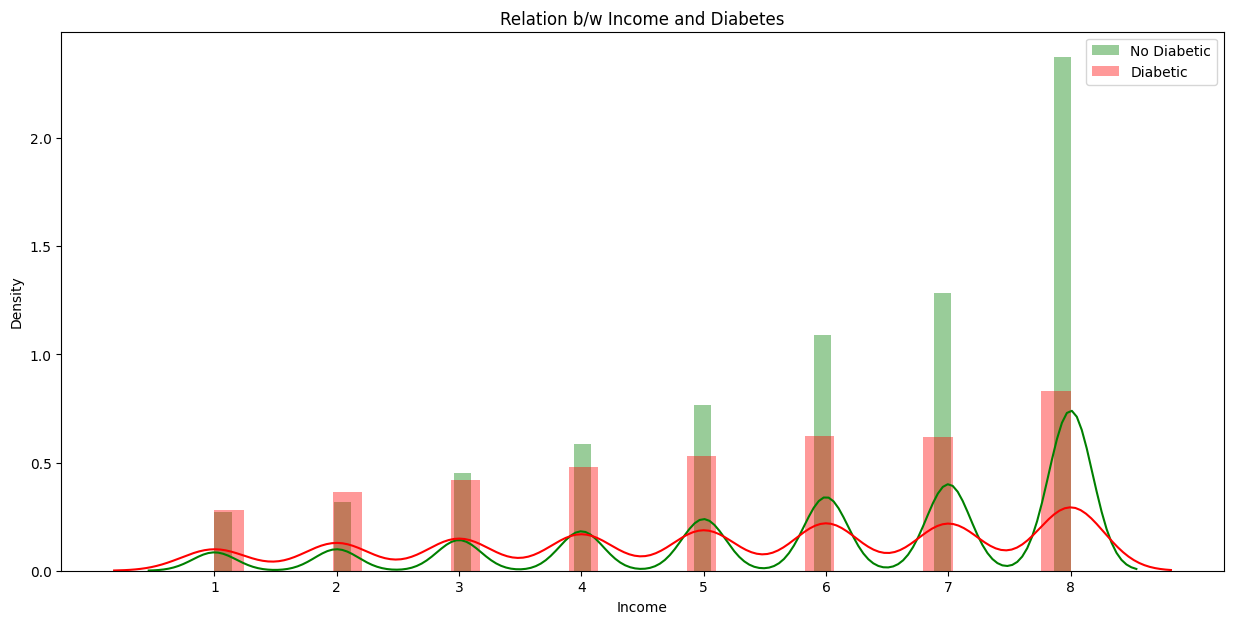

In [46]:
plt.figure(figsize=(15,7))
warnings.filterwarnings('ignore')

sns.distplot(df.Income[df.Diabetes_binary == 0], color="g", label="No Diabetic" )
sns.distplot(df.Income[df.Diabetes_binary == 1], color="r", label="Diabetic" )
plt.title("Relation b/w Income and Diabetes")
plt.xticks(df["Income"].unique())

plt.legend()